In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training')
!ls

Mounted at /content/drive
checkpoints	      my_checkpoints		    Real-ESRGAN       results
CycleGan_train.ipynb  pytorch-CycleGAN-and-pix2pix  requirements.txt  sunny_vs_rainy


# Training of Cycle Gan model for Sunny2Rainy

In [ ]:
from PIL import Image
import os

def resize_images(input_dir, output_dir, prefix, size=(256, 256)):
    os.makedirs(output_dir, exist_ok=True)
    # Get list of files and sort them to ensure consistent numbering
    files = sorted(os.listdir(input_dir))
    for i, filename in enumerate(files, start=1):  # Start numbering from 1
        # Open and resize the image
        img = Image.open(os.path.join(input_dir, filename)).resize(size)
        # Convert RGBA to RGB before saving
        img = img.convert('RGB')
        # Create new filename with prefix and number (e.g., sunny_1.jpg)
        new_filename = f"{prefix}_{i}.jpg"
        # Save the image with the new name
        img.save(os.path.join(output_dir, new_filename))

# Resize and rename images for trainA (sunny) and trainB (cloudy/rainy)
resize_images('sunny_vs_rainy/trainA', 'sunny_vs_rainy/train_resized/trainA_resized', prefix='sunny')
resize_images('sunny_vs_rainy/trainB', 'sunny_vs_rainy/train_resized/trainB_resized', prefix='cloudy')

In [2]:
print(f"trainA-Sunny size: {len(os.listdir('sunny_vs_rainy/train_resized/trainA_resized'))}, trainB-Rainy size: {len(os.listdir('sunny_vs_rainy/train_resized/trainB_resized'))}")

FileNotFoundError: [Errno 2] No such file or directory: 'sunny_vs_rainy/train_resized/trainA_resized'

In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
!cd pytorch-CycleGAN-and-pix2pix

fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=384edd4640fa826aed5709a0b40b7c1add7a9335563af7abac5de46134187f43
  Stored in directory: /root/.cache/pip/wheels/fa/a4/bb/2be445c295d88a74f9c0a4232f04860ca489a5c7c57eb959d9
Successfully built visdom


In [21]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=070b41c674bfbcfa9a44eade4ec4199692c14a315ec5cf23bbc9b576f89bbeb5
  Stored in directory: /root/.cache/pip/wheels/fa/a4/bb/2be445c295d88a74f9c0a4232f04860ca489a5c7c57eb959d9
Successfully built visdom


In [ ]:
!python pytorch-CycleGAN-and-pix2pix/train.py --dataroot ./sunny_vs_rainy/train_resized --name sunny2rainy --model cycle_gan --n_epochs 300 \
--batch_size 16 --verbose --print_freq 10 --save_epoch_freq 10 --save_latest_freq 1000 --checkpoints_dir ./my_checkpoints \
--rotation_degrees 15 --zoom_max 1.3

Streaming output truncated to the last 5000 lines.
(epoch: 37, iters: 384, time: 0.052, data: 0.007) D_A: 0.110 G_A: 0.330 cycle_A: 1.517 idt_A: 0.777 D_B: 0.168 G_B: 0.515 cycle_B: 1.690 idt_B: 0.776 
(epoch: 37, iters: 464, time: 0.052, data: 0.006) D_A: 0.110 G_A: 0.371 cycle_A: 1.714 idt_A: 0.620 D_B: 0.148 G_B: 0.711 cycle_B: 1.572 idt_B: 0.800 
(epoch: 37, iters: 544, time: 0.064, data: 0.006) D_A: 0.161 G_A: 0.345 cycle_A: 1.702 idt_A: 0.691 D_B: 0.134 G_B: 0.488 cycle_B: 1.816 idt_B: 0.774 
(epoch: 37, iters: 624, time: 0.052, data: 0.006) D_A: 0.224 G_A: 0.542 cycle_A: 1.998 idt_A: 0.704 D_B: 0.106 G_B: 0.699 cycle_B: 1.545 idt_B: 0.810 
(epoch: 37, iters: 704, time: 0.052, data: 0.006) D_A: 0.205 G_A: 0.616 cycle_A: 1.496 idt_A: 0.612 D_B: 0.340 G_B: 0.690 cycle_B: 1.486 idt_B: 0.704 
(epoch: 37, iters: 784, time: 0.052, data: 0.006) D_A: 0.195 G_A: 0.345 cycle_A: 1.625 idt_A: 0.557 D_B: 0.254 G_B: 0.746 cycle_B: 1.233 idt_B: 0.773 
(epoch: 37, iters: 864, time: 0.052, data: 

In [22]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot ./sunny_vs_rainy/test_t --name sunny2rainy --model cycle_gan --num_test 50 --checkpoints_dir ./my_checkpoints --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./my_checkpoints              	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: ./sunny_vs_rainy/test_t       	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

# Upscaling generated images

PIL scaling method

In [13]:
from PIL import Image
import os

def upscale_basic(input_dir, output_dir, size=(1024, 1024)):
    os.makedirs(output_dir, exist_ok=True)
    for filename in os.listdir(input_dir):
        img = Image.open(os.path.join(input_dir, filename)).resize(size, Image.BICUBIC)
        img.save(os.path.join(output_dir, filename))

upscale_basic('results/sunny2rainy/test_latest/images', 'results/sunny2rainy/upscaled_basic')

display(img)

Real-ERSGAN method (xinntao)

In [2]:
!git clone https://github.com/xinntao/Real-ESRGAN.git
!cd Real-ESRGAN

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 759, done.
remote: Total 759 (delta 0), reused 0 (delta 0), pack-reused 759 (from 1)
Receiving objects: 100% (759/759), 5.39 MiB | 12.53 MiB/s, done.
Resolving deltas: 100% (408/408), done.


In [6]:
!pip install -r '/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training/Real-ESRGAN/requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.

In [7]:
!sed -i 's/from torchvision.transforms.functional_tensor import rgb_to_grayscale/from torchvision.transforms.functional import rgb_to_grayscale/' '/usr/local/lib/python3.11/dist-packages/basicsr/data/degradations.py'

In [37]:
!python Real-ESRGAN/inference_realesrgan.py -n RealESRGAN_x4plus.pth -i "/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training/results/sunny2rainy/test_latest/test" \
-o '/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training/results/upscaled_basic' -g -1

Testing 0 mbs_cloudy_1_fake_A
Traceback (most recent call last):
  File "/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training/Real-ESRGAN/inference_realesrgan.py", line 166, in <module>
    main()
  File "/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training/Real-ESRGAN/inference_realesrgan.py", line 147, in main
    output, _ = upsampler.enhance(img, outscale=args.outscale)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training/Real-ESRGAN/realesrgan/utils.py", line 223, in enhance
    self.process()
  File "/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training/Real-ESRGAN/rea

Real-ERSGAN (sberbank)

In [3]:
!pip install git+https://github.com/sberbank-ai/Real-ESRGAN.git
!cd Real-ERSGAN

  Cloning https://github.com/sberbank-ai/Real-ESRGAN.git to /tmp/pip-req-build-1sgpb29q
  Running command git clone --filter=blob:none --quiet https://github.com/sberbank-ai/Real-ESRGAN.git /tmp/pip-req-build-1sgpb29q
  Resolved https://github.com/sberbank-ai/Real-ESRGAN.git to commit 362a0316878f41dbdfbb23657b450c3353de5acf
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:

In [ ]:
!pip install huggingface_hub==0.7.0

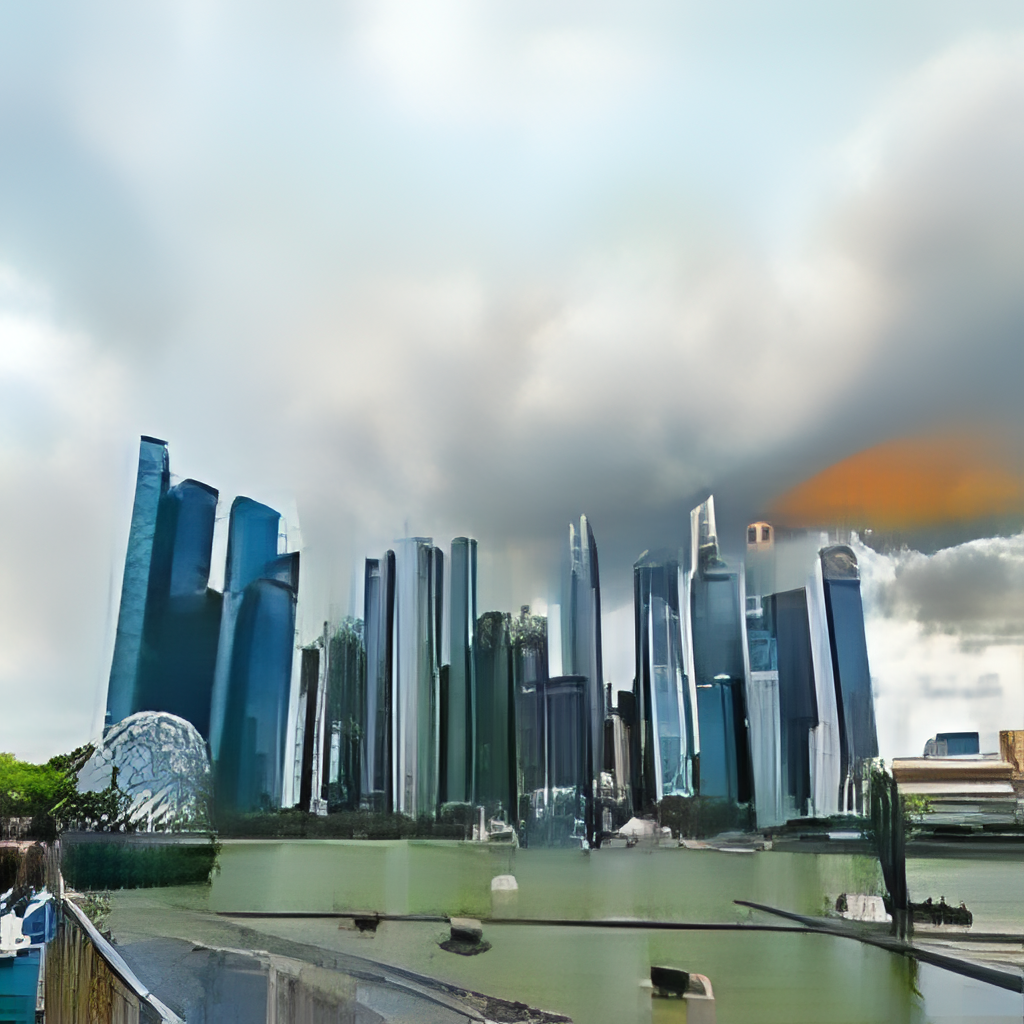

In [ ]:
import torch
from PIL import Image
import numpy as np
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RealESRGAN(device, scale=4)
model.load_weights('/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training/Real-ERSGAN/weights/RealESRGAN_x4.pth', download=False)

path_to_image = '/content/drive/MyDrive/NUS_ISS_IS_Masters/Semester 3 Practice Module 3/CycleGAN Weather Training/results/sunny2rainy/test_latest/test/mbs_cloudy_2_fake_A.png'
image = Image.open(path_to_image).convert('RGB')

sr_image = model.predict(image)
sr_image.save('results/upscaled_basic')

display(sr_image)

D_A: 2.169:
Loss of the discriminator for domain A (sunny images). D_A tries to distinguish real sunny images from fake ones generated by G_B (B→A).

Value: 2.169 is relatively high early in training, as the discriminator is still learning. Ideally, it stabilizes around 0.5 as G_B improves, balancing the adversarial game.

G_A: 2.360:
Loss of the generator G_A (sunny→rainy). This includes:
Adversarial loss (fooling D_B with fake rainy images).

Cycle-consistency loss (part of cycle_A).

Optionally, identity loss (part of idt_A if --lambda_identity > 0).

Value: 2.360 reflects the combined loss. Early in training, it’s high as G_A is still refining its outputs.

cycle_A: 5.122:
Cycle-consistency loss for domain A: Measures how well the cycle A→B→A reconstructs the original sunny image (||G_B(G_A(A)) - A||).

Weighted by --lambda_A (default: 10), so the raw L1 loss is ~0.5122, then multiplied by 10.

Value: 5.122 is reasonable early on but should decrease as training progresses, indicating better reconstruction.

idt_A: 2.607:
Identity loss for domain A: Measures how well G_B preserves sunny images when applied to them directly (||G_B(A) - A||). Only included if --lambda_identity > 0 (default: 0.5).

Weighted by --lambda_identity × --lambda_A (e.g., 0.5 × 10 = 5), so raw loss is ~0.5214.

Value: 2.607 suggests G_B slightly alters sunny images when it shouldn’t, which is expected early in training.

D_B: 1.579:
Loss of the discriminator for domain B (rainy images). D_B distinguishes real rainy images from fake ones generated by G_A (A→B).

Value: 1.579, like D_A, is high initially and should drop toward 0.5 as G_A improves.

G_B: 1.656:
Loss of the generator G_B (rainy→sunny). Combines adversarial loss (fooling D_A), cycle-consistency (part of cycle_B), and identity loss (part of idt_B).

Value: 1.656 is lower than G_A’s loss, possibly indicating G_B is learning faster or domain B is easier to generate.

cycle_B: 4.744:
Cycle-consistency loss for domain B: Measures reconstruction quality for B→A→B (||G_A(G_B(B)) - B||).

Weighted by --lambda_B (default: 10), so raw loss is ~0.4744.

Value: 4.744 is slightly lower than cycle_A, suggesting better reconstruction for rainy→sunny→rainy at this point.

idt_B: 2.507:
Identity loss for domain B: Measures preservation of rainy images by G_A (||G_A(B) - B||).

Weighted by --lambda_identity × --lambda_B (e.g., 0.5 × 10 = 5), so raw loss is ~0.5014.

Value: 2.507 is close to idt_A, indicating similar identity preservation challenges.

